In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [17]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"nikhilgupta2005","key":"0671963a83428554a31f4abb4d7a12b1"}'}

In [33]:
import os

path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

# List files in the dataset folder
print("Dataset contents:", os.listdir(path))


Path to dataset files: /kaggle/input/chest-xray-pneumonia
Dataset contents: ['chest_xray']


In [34]:
base_dir =  "/kaggle/input/chest-xray-pneumonia/chest_xray"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

print("Base Directory:", base_dir)
print("Train Directory:", train_dir)
print("Validation Directory:", val_dir)
print("Test Directory:", test_dir)

Base Directory: /kaggle/input/chest-xray-pneumonia/chest_xray
Train Directory: /kaggle/input/chest-xray-pneumonia/chest_xray/train
Validation Directory: /kaggle/input/chest-xray-pneumonia/chest_xray/val
Test Directory: /kaggle/input/chest-xray-pneumonia/chest_xray/test


In [35]:
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 1)

In [53]:
batch_size = 32
epochs = 5

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [38]:
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'
)

Found 5216 images belonging to 2 classes.


In [40]:
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'
)

Found 16 images belonging to 2 classes.


In [41]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

Found 624 images belonging to 2 classes.


In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [45]:
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [46]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 51,671,521 (197.11 MB)

 Trainable params: 51,669,601 (197.10 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [49]:
checkpoint = ModelCheckpoint(
    'pneumonia_model_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

In [50]:
callbacks = [checkpoint, early_stopping, reduce_lr]

In [51]:
normal_samples = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
pneumonia_samples = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
total_samples = normal_samples + pneumonia_samples
class_weight = {
    0: (total_samples / (2 * normal_samples)),
    1: (total_samples / (2 * pneumonia_samples))
}

print(f"Class weights: {class_weight}")

Class weights: {0: 1.9448173005219984, 1: 0.6730322580645162}


In [54]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=callbacks,
    class_weight=class_weight
)

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.7998 - loss: 0.4172
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to pneumonia_model_best.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 89s 545ms/step - accuracy: 0.8001 - loss: 0.4167 - val_accuracy: 0.5000 - val_loss: 10.9250 - learning_rate: 1.0000e-04
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.8844 - loss: 0.2460
Epoch 2: val_accuracy did not improve from 0.50000
163/163 ━━━━━━━━━━━━━━━━━━━━ 110s 350ms/step - accuracy: 0.8844 - loss: 0.2460 - val_accuracy: 0.5000 - val_loss: 26.9650 - learning_rate: 1.0000e-04
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.8932 - loss: 0.2438
Epoch 3: val_accuracy did not improve from 0.50000
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 353ms/step - accuracy: 0.8933 - loss: 0.2437 - val_accuracy: 0.5000 - val_loss: 24.2188 - learning_rate: 1.0000e-04
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.9228 - loss: 0.1785
Epoch 4: val_accuracy improved from 0.50000 to 0.56250, saving model to pneumonia_model_best.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 400ms/step - accuracy: 0.9227 - loss: 0.1786 - val_accuracy: 0.5625 - val_loss: 0.8664 - learning_rate: 1.0000e-04
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.9303 - loss: 0.1711
Epoch 5: val_accuracy did not improve from 0.56250
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 350ms/step - accuracy: 0.9303 - loss: 0.1712 - val_accuracy: 0.5625 - val_loss: 1.3312 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 4.


In [55]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 284ms/step - accuracy: 0.6813 - loss: 1.3114
Test accuracy: 0.7965


In [56]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

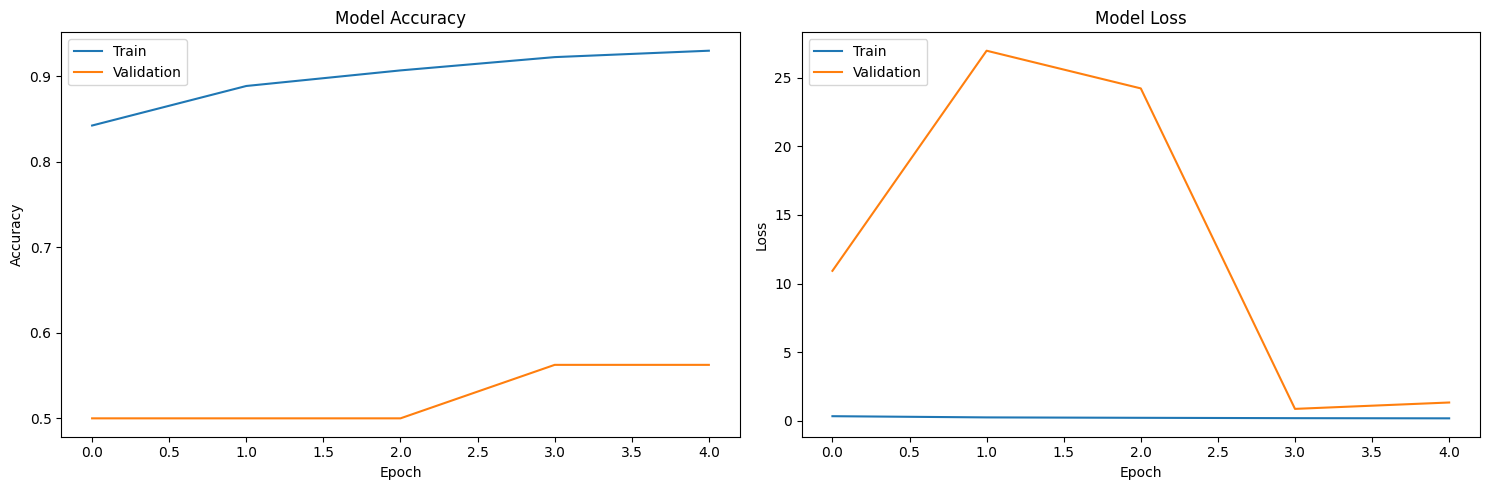

In [57]:
plot_training_history(history)

In [ ]:
# from tensorflow.keras.models import load_model
# model = load_model("/content/pneumonia_model_best.h5")

# # Make predictions
# test_generator.reset()
# y_pred = model.predict(test_generator, steps=len(test_generator))
# y_pred = y_pred.squeeze()  # Ensure correct shape

# # Convert predictions to class labels
# y_pred_classes = (y_pred > 0.5).astype(int)
# y_true = test_generator.classes

# print("Predictions:", y_pred_classes)
# print("True Labels:", y_true)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1

In [64]:
print("Classification Report:")
target_names = ['Normal', 'Pneumonia']
print(classification_report(y_true, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

      Normal       0.88      0.53      0.66       234
   Pneumonia       0.77      0.96      0.85       390

    accuracy                           0.80       624
   macro avg       0.83      0.74      0.76       624
weighted avg       0.81      0.80      0.78       624



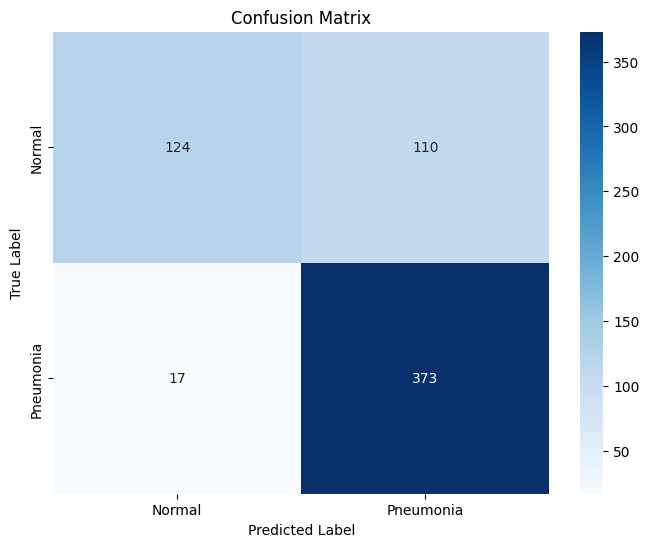

In [65]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig('confusion_matrix.png')
    plt.show()

plot_confusion_matrix(y_true, y_pred_classes, target_names)

In [ ]:
# def predict_pneumonia(img_path):
#     from tensorflow.keras.preprocessing import image
#     from tensorflow.keras.models import load_model

#     # Load the best model
#     model = load_model('pneumonia_model_best.h5')

#     # Load and preprocess the image
#     img = image.load_img(img_path, target_size=(img_width, img_height), color_mode='grayscale')
#     img_array = image.img_to_array(img)
#     img_array = img_array / 255.0
#     img_array = np.expand_dims(img_array, axis=0)

#     # Make prediction
#     prediction = model.predict(img_array)[0][0]

#     # Display result
#     plt.imshow(img, cmap='gray')
#     plt.title(f"Prediction: {'Pneumonia' if prediction > 0.5 else 'Normal'} ({prediction:.2f})")
#     plt.axis('off')
#     plt.show()

#     return prediction